In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import cv2
import os
import PIL
import numpy as np

%matplotlib inline

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data=pathlib.Path(data_dir)
data

WindowsPath('datasets/flower_photos')

In [5]:
image_count=len(list(data.glob("**/*.jpg")))

In [6]:
images=list(data.glob("**/*.jpg"))

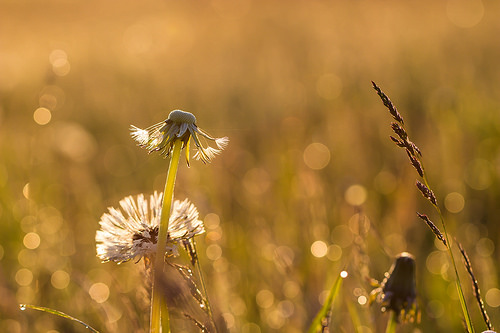

In [7]:
PIL.Image.open(str(images[900]))

In [8]:
roses = list(data.glob('*/roses/*'))

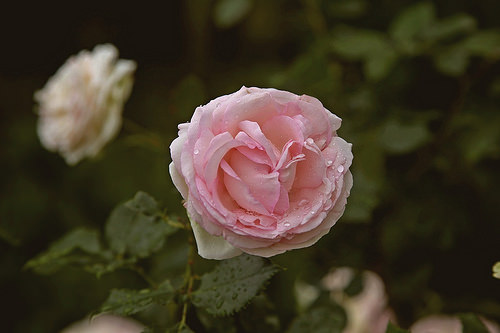

In [9]:
PIL.Image.open(str(roses[100]))

In [8]:
flowers_images_dict = {
    'roses': list(data.glob('*/roses/*')),
    'daisy': list(data.glob('*/daisy/*')),
    'dandelion': list(data.glob('*/dandelion/*')),
    'sunflowers': list(data.glob('*/sunflowers/*')),
    'tulips': list(data.glob('*/tulips/*')),
}

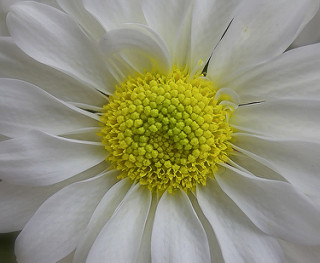

In [11]:
PIL.Image.open(flowers_images_dict['daisy'][0])

In [9]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [10]:
import cv2
image=cv2.imread(str(flowers_images_dict['roses'][0]))

In [11]:
image.shape

(240, 179, 3)

In [12]:
cv2.resize(image,(180,180)).shape

(180, 180, 3)

In [13]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
resized_img=cv2.resize(img,(180,180))

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [15]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [16]:
X=np.array(X)
y=np.array(y)

In [17]:
X.shape

(3670, 180, 180, 3)

In [18]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.2)

In [19]:
x_train.shape

(2936, 180, 180, 3)

In [20]:
x_train_scaled=(x_train)/255
x_test_scaled=(x_test)/255

In [23]:
def getmodel():
    model=keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5)
    ])
    model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
    return model

In [25]:
%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model=getmodel()
    gpu_model.fit(x_train_scaled,y_train, epochs=3)

Epoch 1/3
92/92 [==============================] - 60s 603ms/step - loss: 1.3101 - accuracy: 0.4309
Epoch 2/3
92/92 [==============================] - 56s 612ms/step - loss: 1.0660 - accuracy: 0.5637
Epoch 3/3
92/92 [==============================] - 56s 609ms/step - loss: 0.9122 - accuracy: 0.6499


In [26]:
%timeit -n1 -r1
with tf.device('/CPU:0'):
    gpu_model=getmodel()
    gpu_model.fit(x_train_scaled,y_train, epochs=3)

Epoch 1/3
92/92 [==============================] - 63s 667ms/step - loss: 1.3117 - accuracy: 0.4223
Epoch 2/3
92/92 [==============================] - 65s 703ms/step - loss: 1.0139 - accuracy: 0.5957
Epoch 3/3
92/92 [==============================] - 72s 784ms/step - loss: 0.8064 - accuracy: 0.6877
